# Import

In [7]:
from GDA import GDA
from plot import plot_cov_ellipse
from gen_data import generate_multimodal_data
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as SklearnLDA


# Function to compare GMM Discriminant Analysis with Sklearn LDA
def compare_gmm_lda(X_train, X_test, y_train, y_test, gda_components=2, lda_components=2):
    # 1. GMM Discriminant Analysis
    gmm_classifier = GDA(n_components=gda_components)
    gmm_classifier.fit(X_train, y_train)
    y_pred_gmm = gmm_classifier.predict(X_test)
    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)

    # 2. Sklearn LDA for comparison
    lda_sklearn = SklearnLDA(n_components=lda_components)
    lda_sklearn.fit(X_train, y_train)
    y_pred_lda = lda_sklearn.predict(X_test)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)

    # 3. Plot the results
    plt.figure(figsize=(10, 5))

    # GMM Discriminant Analysis Plot
    plt.subplot(1, 2, 1)
    plt.title(f"GMM Discriminant Analysis (Accuracy: {accuracy_gmm:.4f})")
    for cls in np.unique(y_train):
        plt.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    # Sklearn LDA Plot
    plt.subplot(1, 2, 2)
    plt.title(f"Sklearn LDA (Accuracy: {accuracy_lda:.4f})")
    for cls in np.unique(y_train):
        plt.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}")
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.legend()

    plt.tight_layout()
    plt.show()




0
1
2


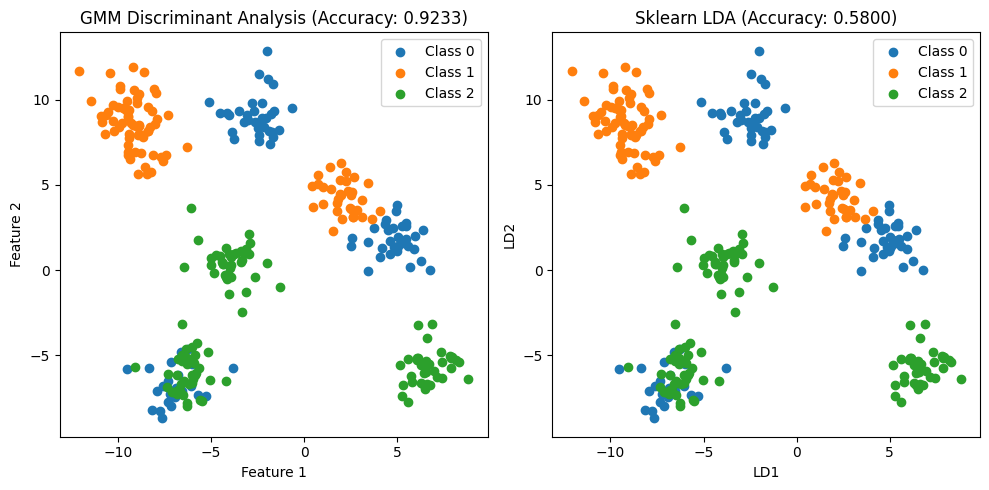

In [5]:
# Generate a multimodal dataset
OMP_NUM_THREADS=1
X, y = generate_multimodal_data(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare GMM Discriminant Analysis with LDA
compare_gmm_lda(X_train, X_test, y_train, y_test, gda_components=[3, 2, 3])

0
1
2


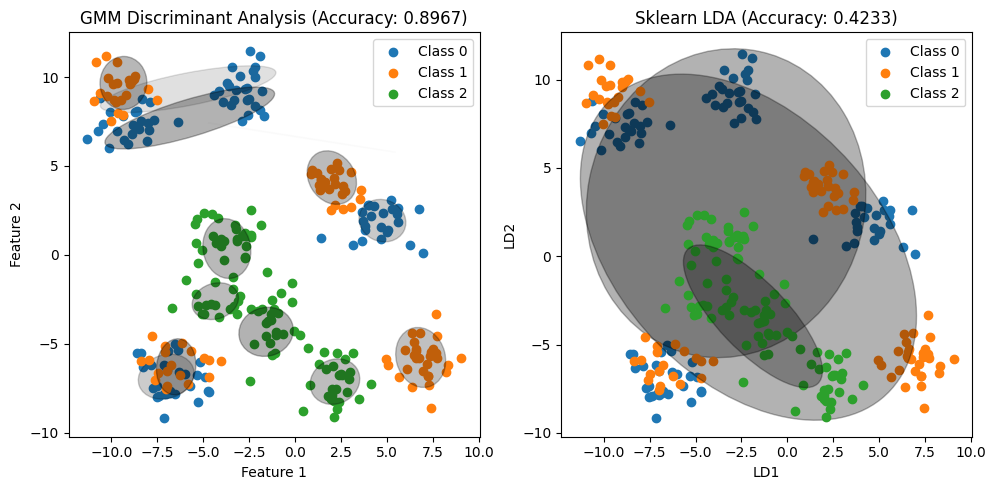

: 

In [9]:
from sklearn.mixture import GaussianMixture


# plot means + covariance
def plot_gmm_lda(X_train, X_test, y_train, y_test, n_components=2):

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # 1. GMM Discriminant Analysis
    gmm_classifier = GDA(n_components=n_components, km_init=True)
    gmm_classifier.fit(X_train, y_train)
    y_pred_gmm = gmm_classifier.predict(X_test)
    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)

    # Plot GMM means and covariance ellipses
    ax = axes[0]
    ax.set_title(f"GMM Discriminant Analysis (Accuracy: {accuracy_gmm:.4f})")
    for cls in np.unique(y_train):
        ax.scatter(
            X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}"
        )
        gmm = gmm_classifier.gmms[cls]
        max_weights = max(gmm.weights_)
        for i in range(gmm.n_components):
            mean = gmm.means_[i]
            cov = gmm.covariances_[i]
            tau = gmm.weights_[i] / max_weights
            plot_cov_ellipse(cov, mean, ax, color="black", alpha=0.3 * tau)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()

    # 2. Sklearn LDA for comparison
    lda_sklearn = SklearnLDA()
    lda_sklearn.fit(X_train, y_train)
    y_pred_lda = lda_sklearn.predict(X_test)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)

    # Plot LDA means and covariance
    ax = axes[1]
    ax.set_title(f"Sklearn LDA (Accuracy: {accuracy_lda:.4f})")
    for cls in np.unique(y_train):
        ax.scatter(
            X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}"
        )
        mean = lda_sklearn.means_[cls]
        cov = np.cov(X_train[y_train == cls].T)
        plot_cov_ellipse(cov, mean, ax, color="black")
    ax.set_xlabel("LD1")
    ax.set_ylabel("LD2")
    ax.legend()

    plt.tight_layout()
    plt.show()


# Generate a multimodal dataset
X, y = generate_multimodal_data(
    n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=4
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Compare GMM Discriminant Analysis with LDA
plot_gmm_lda(X_train, X_test, y_train, y_test, n_components=[5, 4, 4])

## Mnist tests

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np


# Download MNIST training
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

#  Convert training data to NumPy arrays
train_images = trainset.data.numpy()   # Shape: (60000, 28, 28)
train_labels = trainset.targets.numpy()  # Shape: (60000,)
test_images = testset.data.numpy()    # Shape: (10000, 28, 28)
test_labels = testset.targets.numpy()  # Shape: (10000,)

# flatten images into normalized vectors
X_train = train_images.reshape(train_images.shape[0], -1)  / 255 # Shape: (60000, 784)
X_test = test_images.reshape(test_images.shape[0], -1)  /255   # Shape: (10000, 784)
Y_train = train_labels
Y_test = test_labels
# shapes print
print(f"Train images shape: {X_train.shape}, Train labels shape: {Y_train.shape}")
print(f"Test images shape: {X_test.shape}, Test labels shape: {Y_test.shape}")


gda_components = [4, 3, 5, 3, 5, 4, 5, 3, 4, 4]



# 1. GMM Discriminant Analysis
gmm_classifier = GDA(n_components=gda_components, covariance_type='full')
gmm_classifier.fit(X_train, Y_train, n_jobs=1)
Y_pred_gmm = gmm_classifier.predict(X_test)
accuracy_gmm = accuracy_score(Y_test, Y_pred_gmm)

# 2. Sklearn LDA for comparison
lda_sklearn = SklearnLDA(solver="svd")
lda_sklearn.fit(X_train, Y_train)
Y_pred_lda = lda_sklearn.predict(X_test)
accuracy_lda = accuracy_score(Y_test, Y_pred_lda)

print(f"Sklearn LDA (Accuracy: {accuracy_lda:.4f})")
print(f"GDA (Accuracy: {accuracy_gmm:.4f})")


Train images shape: (60000, 784), Train labels shape: (60000,)
Test images shape: (10000, 784), Test labels shape: (10000,)
0


KeyboardInterrupt: 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
alzheimer_df = pd.read_table("./data/alzheimer/Alzheimer_Webster.txt", header=0, sep=" ")
target = "Y"
pca = PCA(n_components=30)
X = pca.fit_transform(alzheimer_df.drop(columns=[target]))
y = alzheimer_df["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y)




,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9966826-S,GI_9966840-S,GI_9966848-S,GI_9966856-S,GI_9966874-A,GI_9966880-S,GI_9966896-S,GI_9966902-S,GI_9994168-S,Y
WGACON.219,10223.2,131.0,1853.7,72.300000,187.6,1765.2,165.0,649.9,273.2,152.3,...,319.1,82.0,45.0,209.1,217.2,25.5,211.9,364.8,61.7,0
WGACON.221,7306.5,85.4,1294.5,195.600000,173.6,754.7,84.1,580.8,220.0,168.6,...,557.4,74.6,51.3,188.7,393.4,57.9,106.7,273.0,80.1,0
WGACON.234,4644.5,212.8,1286.5,28.300000,330.7,845.7,1253.6,415.2,183.1,457.3,...,539.4,34.7,62.0,209.6,83.4,98.0,163.4,257.6,103.3,0
WGACON.274,5679.0,115.7,1009.1,106.400000,403.0,579.9,222.1,249.5,239.0,62.6,...,530.8,49.7,39.2,186.9,130.4,74.3,133.2,292.3,99.7,0
WGACON.277,5648.3,124.8,982.0,145.200000,360.5,905.1,73.5,364.2,241.0,130.8,...,693.3,101.8,53.9,186.6,235.3,73.1,81.3,385.4,93.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WGAAD.69,3700.3,123.8,1102.5,75.600000,246.0,1321.6,240.2,731.7,146.6,195.1,...,418.4,56.6,64.7,210.0,232.7,39.7,180.0,240.7,120.4,1
WGAAD.45,2673.4,125.1,1044.1,65.400000,203.3,963.8,281.1,692.6,132.6,228.0,...,436.9,72.9,40.7,190.1,157.2,91.3,178.8,548.9,186.6,1
WGAAD.89,3877.5,192.2,1260.5,92.700000,146.2,1261.3,314.5,959.2,112.3,164.3,...,471.2,64.3,61.2,184.4,272.0,60.4,155.1,366.8,152.3,1
WGAAD.391,4029.4,219.3,1636.5,29.400000,316.5,340.7,634.5,1197.2,297.7,368.9,...,699.3,58.2,53.4,247.5,82.9,152.4,256.0,220.2,30.3,1


In [8]:
gda = GDA(n_components=3, km_init=True)
gda.fit(X_train, y_train)

c:\Users\Po_KL\miniconda3\envs\torchenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KeyboardInterrupt: 